In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Creating file database....")
df=pd.read_csv('/content/drive/MyDrive/IR ASSIGNMENT 2/IR-assignment-2-data (2).zip',sep=" ",header=None)
filedatabase={}
for iterator in range(0,len(df.index)):
    check1=df.at[iterator,1]
    if ("qid:4"==check1):
        filedatabase[iterator]=df.at[iterator,0]
print("File database created successfully")

Creating file database....
File database created successfully


In [ ]:
def queryurlfile(df, filedatabase):
    newdataframe=df.drop((df.index[len(filedatabase):]))
    #newdataframe.to_csv("fileobtained.csv")
    np.savetxt('fileobtained.txt',newdataframe.values,delimiter=" ",fmt='%s')

In [ ]:
queryurlfile(df,filedatabase)
tupledocid=filedatabase.items()
tupledocid=list(tupledocid)
filedatabase=sorted(filedatabase.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)

In [ ]:
def countfinal(filedatabase):
    find1=0
    find2=0
    find3=0
    find4=0
    for iterator in filedatabase:
        if (iterator[1]==1):
            find3=find3+1;
        elif (iterator[1]==2):
            find2=find2+1;
        elif (iterator[1]==3):
            find1=find1+1;
        else:
            find4=find4+1;
    a=math.factorial(find1)
    b=math.factorial(find2)
    c=math.factorial(find3)
    d=math.factorial(find4)
    answer=a*b*c*d
    return answer
countfinal(filedatabase)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

In [ ]:
def calculate1(files,cal_len):
    output=files[0][1]
    for iterator in range(1,cal_len):
        d=files[iterator][1]
        e=math.log2(iterator+1)
        output=output+(d/e)   
    return output 

In [ ]:
length_a=len(filedatabase)
length_b=len(tupledocid)
calundcg=calculate1(tupledocid,length_b)
calundcgval=calculate1(tupledocid,51)
caldcgmax=calculate1(filedatabase,length_a)
caldcgval=calculate1(filedatabase,51)
ndcg50=calundcgval/caldcgval
ndcgwhole=calundcg/caldcgmax
print("nDCG at 50: {0:32}".format(ndcg50))
print("nDCG for whole Dataset: ",ndcgwhole)

nDCG at 50:               0.3521042740324887
nDCG for whole Dataset:  0.5979226516897831


In [ ]:
def calculate2(filedatabase):
    for iterator in range(0,len(df.index)):
        check1=df.at[iterator,1]
        if("qid:4"==check1):
            store=float(df.at[iterator,76][3:])
            f=df.at[iterator,0]
            variable=(store,f)
            filedatabase[iterator]=variable

In [ ]:
storedval={}

In [ ]:
def gpr(pair1):
    xaxis=[]
    cal3=sorted(pair1.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)
    document1=103
    yaxis=[]
    document2=74
    document3=0 
    tfsort=len(cal3)
    for iterator in range(0,tfsort):
        if (cal3[iterator][1][1]!=0):
            document3=document3+1
        p=document3/(iterator+1)
        yaxis.append(p)
        r=document3/document2
        xaxis.append(r)
    plt.plot(xaxis, yaxis,color='green',linewidth=2.5)
    plt.title('Precision Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

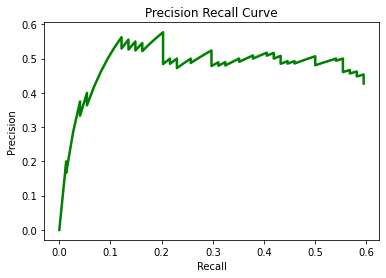

In [ ]:
calculate2(storedval)
gpr(storedval)